## Observations and Insights

After observing the data various conclusions can be drawn from the experiement:
* Capomulin, Ramicane, Ceftamin, Infubinol have the lowest SEM, and three of the four are the highest performing regimens, therefore, it is safe to conclude that a lower SEM makes for a more successful drug regimen.
* Capomulin & Ramicane are the most successful drug regimens with a tumor volume of 10 less than the two other top four drug regimens (40 vs. 50).
* Based on the line plot, tumor volumes increase before making a rapid decease during the duration of the experient. The volume increases during the first third of the time and deceases during the remaining two-thirds of the time frame.
* After analyzing the scatter plot, the weight and tumor volume are closely related. As the weight in a mouse increases, the tumor volume also increases. The more a most weighs, the larger the tumor is likely to be.

## Dependencies

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [38]:
# Combine the data into a single dataset
mouse_merge_pd = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

## Summary statistics

In [39]:
tumor_group = mouse_merge_pd.set_index("Drug Regimen")

In [40]:
# groupby Drug name & tumor volume to perform calculations
tumor_stat = mouse_merge_pd.groupby("Drug Regimen")["Tumor Volume (mm3)"]
# tumor_stat.describe()

In [41]:
# find mean for each drug using new table
tumor_mean = mouse_merge_pd.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

In [42]:
# find median for each drug using new table
tumor_median = mouse_merge_pd.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

In [43]:
# find variance for each drug using new table
tumor_var = mouse_merge_pd.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

In [44]:
# find standard deviation for each drug using new table
tumor_std = mouse_merge_pd.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

In [45]:
# find SEM for each drug using new table
tumor_SEM = mouse_merge_pd.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(st.sem)

In [46]:
tumor_analysis = pd.DataFrame({"Mean Tumor Volume": tumor_mean,
                             "Median Tumor Volume": tumor_median,
                              "Tumor Volume Variance": tumor_var,
                              "Tumor Volume Std. Dev.": tumor_std,
                              "Tumor Volume Std. Err.": tumor_SEM})
tumor_analysis

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

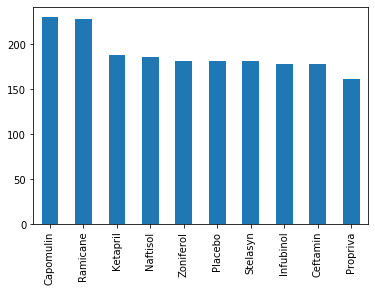

In [47]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
mouse_merge_pd['Drug Regimen'].value_counts().plot(kind='bar');

In [48]:
treatment_group = mouse_merge_pd.groupby('Drug Regimen')
treatment_count = treatment_group['Drug Regimen'].count()

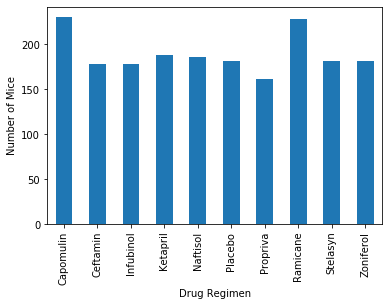

<Figure size 432x288 with 0 Axes>

In [49]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
treatment_chart = treatment_count.plot(kind='bar')

treatment_chart.set_xlabel("Drug Regimen")
treatment_chart.set_ylabel("Number of Mice")

plt.show()
plt.tight_layout()

## Pie plots

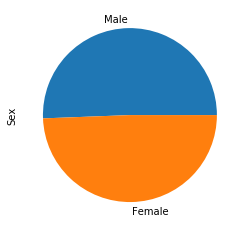

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_merge_pd['Sex'].value_counts().plot(kind='pie');

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_group = mouse_merge_pd.groupby('Sex')
sex_count = sex_group['Sex'].count() 

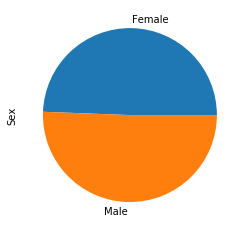

<Figure size 432x288 with 0 Axes>

In [52]:
sex_chart = sex_count.plot(kind='pie')

plt.show()
plt.tight_layout()

## Quartiles, outliers and boxplots

In [53]:
# fina the final tumor volume per drug per mouse & create dataframe based on final volume
max_tp = mouse_merge_pd.groupby('Mouse ID').max()
max_tp = max_tp.reset_index()

In [67]:
mouse_group = max_tp[['Mouse ID','Timepoint']].merge(mouse_merge_pd, on=['Mouse ID','Timepoint'])

In [55]:
# find the mean of the final tumor volume per drug regimen & pull the top 4 
tum_top = mouse_group.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tum_top
tum_final = pd.DataFrame({"Final Tumor Volume": tum_top})
tum_final
tum_sort = tum_final.sort_values(by = ['Final Tumor Volume'], ascending=[True])
tum_4 = tum_sort.head(4)
tum_4

,Final Tumor Volume
Drug Regimen,
Ramicane,36.191390
Capomulin,36.667568
Propriva,56.736964
Ceftamin,57.753977


In [68]:
# create list of top regimen names
treatment_list = list(tum_4.index.values)

In [70]:
# create dataframe with all values for top regimens
total_treatments_df =  mouse_merge_pd[mouse_merge_pd['Drug Regimen'].isin(treatment_list)]

In [71]:
# create dataframe based off of max timepoint values for top regimens
final_treatments_df =  mouse_group[mouse_group['Drug Regimen'].isin(treatment_list)]

In [59]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumor_iqr = final_treatments_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(st.iqr)

In [60]:
def q1(x):
    return x.quantile(0.25)

def q2(x):
    return x.quantile(0.75)

f = {'Tumor Volume (mm3)': ['median', 'std', q1,q2]}
df1 = total_treatments_df.groupby('Drug Regimen').agg(f)
df2 = df1.reset_index()
df2

Drug Regimen Tumor Volume (mm3)                                
                           median       std         q1         q2
0    Capomulin          41.557809  4.994774  37.685933  45.000000
1     Ceftamin          51.776157  6.268188  47.208427  56.801438
2     Propriva          50.854632  6.507770  47.081086  56.184664
3     Ramicane          40.673236  4.846308  36.674635  45.000000

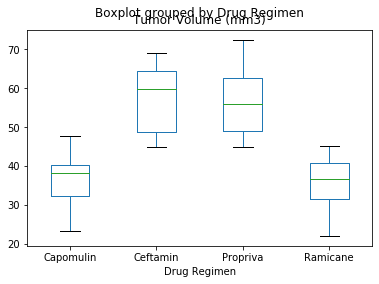

In [72]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot = final_treatments_df.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', grid=False)

## Line and scatter plots

In [73]:
# Generate a line plot of timepoint versus average tumor volume for the Capomulin regimen
tum_line = mouse_merge_pd.loc[(mouse_merge_pd['Drug Regimen'] == "Capomulin")&(mouse_merge_pd['Mouse ID'] == "l509")][['Timepoint','Tumor Volume (mm3)']]
new_tum_line = tum_line.reset_index() 

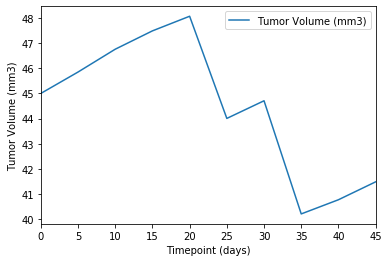

In [74]:
lines = new_tum_line.plot.line(x='Timepoint', y='Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [75]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
tum_scat = mouse_merge_pd.loc[mouse_merge_pd['Drug Regimen'] == "Capomulin"][['Mouse ID','Drug Regimen','Weight (g)','Tumor Volume (mm3)']]
tum_scat_mean = tum_scat.groupby(['Mouse ID']).mean()
new_tum_scat = tum_scat_mean.reset_index() 

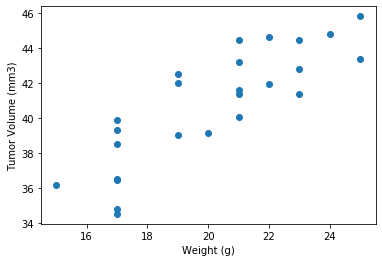

In [76]:
plt.scatter(new_tum_scat['Weight (g)'],new_tum_scat['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

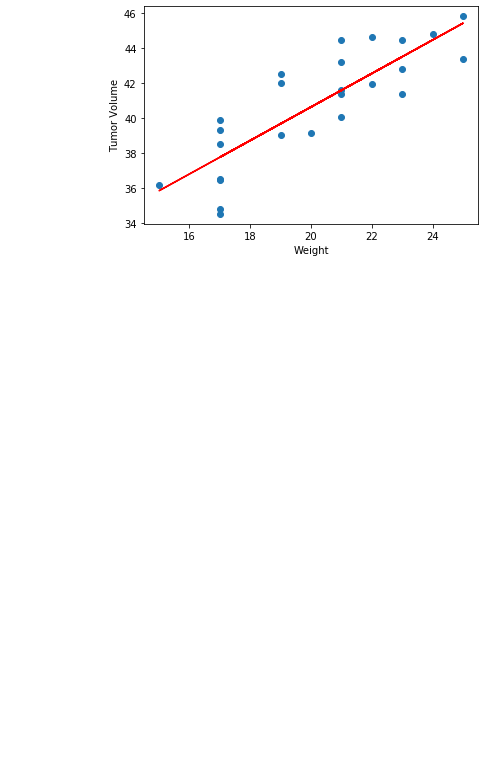

In [77]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
# Add the linear regression equation and line to plot
x_values = new_tum_scat['Weight (g)']
y_values = new_tum_scat['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,4),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.show()